In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
num_down = 2
num_bilateral = 7

In [29]:
img_rgb = cv2.imread('image.png')
print(img_rgb.shape)

(822, 620, 3)


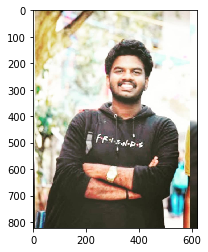

In [30]:
img_rgb = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [31]:
img_rgb = cv2.resize(img_rgb,(800,800))
print(img_rgb.shape)

(800, 800, 3)


## Downsample the image

In [32]:
img_color = img_rgb
for _ in range(num_bilateral):
    img_color = cv2.bilateralFilter(img_color,d=9,sigmaColor=9,sigmaSpace=7)

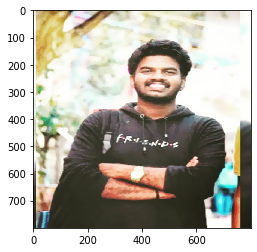

In [33]:
plt.imshow(img_color)

## Upsample,grayscaling,medium blurring and thresholding

In [34]:
for _ in range(num_down):
    img_color = cv2.pyrUp(img_color)

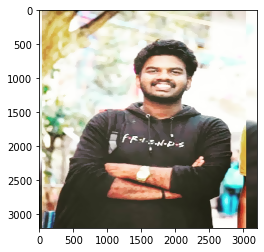

In [35]:
plt.imshow(img_color)

In [73]:
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray,11)

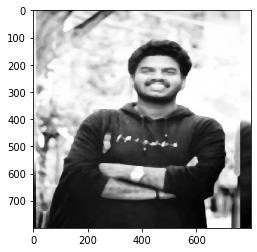

In [74]:
plt.imshow(img_blur,cmap='gray')

In [75]:
img_edge = cv2.adaptiveThreshold(img_blur,200,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,blockSize=9,C=2)

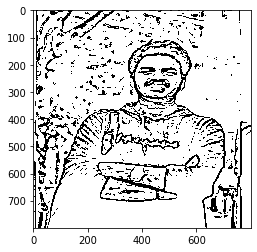

In [76]:
plt.imshow(img_edge,cmap='gray')

In [77]:
img_edge = cv2.cvtColor(img_edge,cv2.COLOR_GRAY2RGB)

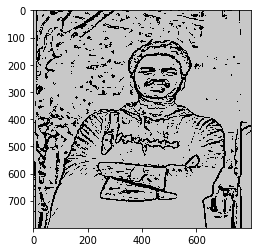

In [78]:
plt.imshow(img_edge)

In [79]:
img_rgb.shape , img_edge.shape

((800, 800, 3), (800, 800, 3))

In [80]:
img_cartoon = cv2.bitwise_and(img_rgb,img_edge)

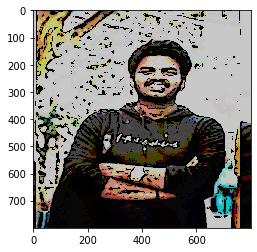

In [81]:
plt.imshow(img_cartoon)

In [83]:
plt.imsave('cartoon.png',img_cartoon)